# Linear Theta Sample

### Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import astropy.table

In [4]:
import json

### Load Linear Phi Arc Test from Feb 2023

See [DESI-7411](https://desi.lbl.gov/DocDB/cgi-bin/private/RetrieveFile?docid=7411) and `/global/cfs/cdirs/desi/engineering/focalplane/linphi/Feb2023` for details.

In [5]:
with open('results-166068.json') as f:
    results = json.load(f)

### Load Recent Calibration Snapshot

In [7]:
snap = astropy.table.Table.read('fp-20260219.ecsv')
snapids = list(snap['DEVICE_ID'])
print(f'Loaded {len(snapids)} devices from snapshot')

Loaded 5138 devices from snapshot


In [8]:
def validate(posids):
    missing = list(set(posids) - set(snapids))
    if missing:
        print(f'WARNING: {len(missing)} posids are not in the snapshot:', ",".join(sorted(missing)))

In [9]:
linphis = [ s['DEVICE_ID'] for s in snap if s['LINPHI'] ]
print(len(linphis), 'linear phi devices:', linphis)

316 linear phi devices: ['M06137', 'M05888', 'M04343', 'M07741', 'M03090', 'M07071', 'M05862', 'M03172', 'M07371', 'M07365', 'M06167', 'M07342', 'M04062', 'M03168', 'M06768', 'M03622', 'M03848', 'M03818', 'M07225', 'M05977', 'M05218', 'M06683', 'M04049', 'M02323', 'M03925', 'M03701', 'M05268', 'M03729', 'M04356', 'M04052', 'M04418', 'M03987', 'M04984', 'M04306', 'M04329', 'M04044', 'M04331', 'M05000', 'M03954', 'M03792', 'M04199', 'M03975', 'M03384', 'M05074', 'M05365', 'M04422', 'M03915', 'M03932', 'M04177', 'M05262', 'M01289', 'M02886', 'M03998', 'M04977', 'M04262', 'M04337', 'M04207', 'M04197', 'M04999', 'M01916', 'M02174', 'M04201', 'M03922', 'M02248', 'M04084', 'M05090', 'M04012', 'M04205', 'M03675', 'M04383', 'M02822', 'M04174', 'M03963', 'M04416', 'M05089', 'M02889', 'M04318', 'M03443', 'M04319', 'M03734', 'M04031', 'M04373', 'M06812', 'M05671', 'M05684', 'M07263', 'M07126', 'M05805', 'M07229', 'M02367', 'M06910', 'M02240', 'M03432', 'M02250', 'M06748', 'M01282', 'M02449', 'M024

### Identify Suspected Linear Thetas

Select robots from Feb 2023 test that moved well in phi, so are presumably linear theta:

Found 275 / 626 probable linear thetas


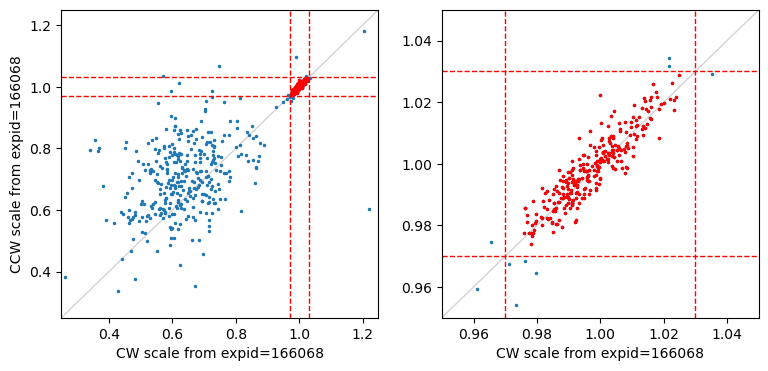

In [10]:
def pass1(results, cut=(0.97, 1.03)):
    expid = results[0]['expid']
    ccw = [ result['scale_CCW'] for result in results ]
    cw = [ result['scale_CW'] for result in results ]
    pos_id = [ result['pos_id'] for result in results ]
    sel = ( (np.array(cw) > cut[0]) & (np.array(cw) < cut[1]) &
            (np.array(ccw) > cut[0]) & (np.array(ccw) < cut[1]) )
    print(f'Found {np.sum(sel)} / {len(ccw)} probable linear thetas')

    fig, axes = plt.subplots(1, 2, figsize=(9,4))

    for k, lim in enumerate(((0.25, 1.25), (0.95, 1.05))):
        ax = axes[k]
        ax.plot([0, 2], [0, 2], '-', c='lightgray', lw=1)
        ax.plot(cw, ccw, '.', ms=3)
        ax.plot(np.array(cw)[sel], np.array(ccw)[sel], 'r.', ms=3)
        ax.set(xlabel='CW scale from expid={}'.format(expid),
               xlim=lim, ylim=lim)
        if k == 0:
            ax.set(ylabel='CCW scale from expid={}'.format(expid))
        ax.axvline(cut[0], color='r', ls='--', lw=1)
        ax.axvline(cut[1], color='r', ls='--', lw=1)
        ax.axhline(cut[0], color='r', ls='--', lw=1)
        ax.axhline(cut[1], color='r', ls='--', lw=1)
    plt.savefig('linear_theta.png')

    return [ pos_id[k] for k in np.where(sel)[0] ]

lintheta1 = pass1(results)
validate(lintheta1)

Add linear thetas with onset after Feb 2023 from Carl:

In [11]:
new_lintheta = "M03401, M03346, M03287, M07599, M03141, M07502, M03858, M04065, M04568, M05328, M03610, M01020, M07737, M06982, M05099, M04199, M01135, M05027, M04801, M04169, M07801, M05771, M05960, M06038, M03600, M03683".split(', ')
double_lintheta = set(new_lintheta) & set(lintheta1)
lintheta2 = list(set(lintheta1) | set(new_lintheta))
print(f'Adding {len(new_lintheta)} new onset linthetas, of which {len(double_lintheta)} are already in the list of candidates:', ",".join(sorted(double_lintheta)))
validate(lintheta2)
print(",".join(sorted(new_lintheta)))

Adding 26 new onset linthetas, of which 0 are already in the list of candidates: 
M01020,M01135,M03141,M03287,M03346,M03401,M03600,M03610,M03683,M03858,M04065,M04169,M04199,M04568,M04801,M05027,M05099,M05328,M05771,M05960,M06038,M06982,M07502,M07599,M07737,M07801


Reject known linear phis:

In [12]:
reject_linphis = set(linphis) & set(lintheta1)
lintheta3 = list(set(lintheta2) - reject_linphis)
print(f'Removed {len(reject_linphis)} linear phi devices that are also linear theta candidates:', ",".join(sorted(reject_linphis)))
validate(lintheta3)
print(",".join(sorted(reject_linphis)))

Removed 4 linear phi devices that are also linear theta candidates: M01616,M01749,M02262,M05517
M01616,M01749,M02262,M05517


Only use robots that are sufficiently tucked in phi:

Found 2 linear theta candidates with phi < 145: M03346,M04568
M03346,M04568


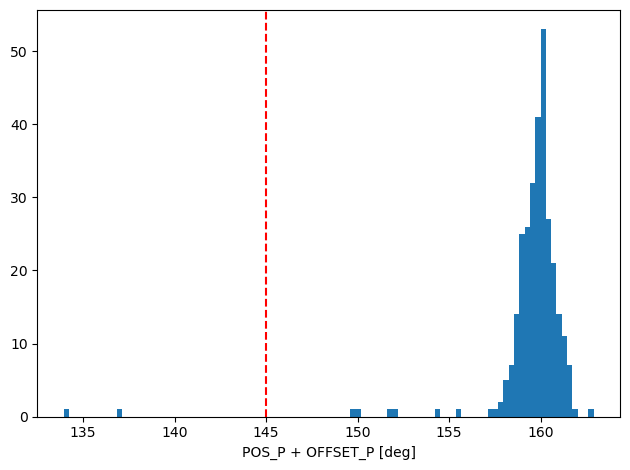

In [13]:
def plot_phi(posids, cut=145):
    phi = [ s['POS_P']+s['OFFSET_P'] for s in snap if s['DEVICE_ID'] in posids ]
    plt.hist(phi, bins=100)
    plt.axvline(cut, color='red', linestyle='--')
    plt.xlabel('POS_P + OFFSET_P [deg]')
    plt.tight_layout()
    plt.savefig('linear_theta_phi.png')
    bad_phi = [ posid for (k,posid) in enumerate(posids) if phi[k] < cut ]
    print(f'Found {len(bad_phi)} linear theta candidates with phi < {cut}:', ",".join(sorted(bad_phi)))
    return bad_phi

bad_phi = plot_phi(lintheta3)
lintheta4 = list(set(lintheta3) - set(bad_phi))
validate(lintheta4)
print(",".join(sorted(bad_phi)))

In [14]:
def make_csv(posids, filename='linear_theta.csv', keepout_expansion=5.5):
    rows = [ ]
    for posid in posids:
        row = {
            'POS_ID': posid,
            'SZ_CW_T': 0.75,
            'SZ_CCW_T': 0.75,
            'ZENO_MOTOR_T': True,
            'KEEPOUT_EXPANSION_THETA_ANGULAR': keepout_expansion,
            'COMMIT_SZ_CW_T': True,
            'COMMIT_SZ_CCW_T': True,
            'COMMIT_ZENO_MOTOR_T': True,
            'COMMIT_KEEPOUT_EXPANSION_THETA_ANGULAR': True
        }
        rows.append(row)
    df = pd.DataFrame(rows)
    df.to_csv(filename, index=False)
    print(f'Wrote {len(df)} rows to {filename}')
    return df

In [15]:
df = make_csv(lintheta4)

Wrote 295 rows to linear_theta.csv
